In [2]:
import numpy as np
import matplotlib.pyplot as plt
from kernel import Kernel

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
%matplotlib inline
plt.rcParams['text.latex.preamble'] = [r'\usepackage{newtxmath}'] 
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times"
plt.rc('text', usetex=True)

/var/folders/yg/djxj05p562nc92kcrz6sfj3c0000gn/T/ipykernel_34408/3356598534.py:2: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{newtxmath}']


In [5]:
np.random.seed(1000)

In [6]:
def target_func(x, omega=2*np.pi):
    return np.sin(omega * x)

n_train = 64
x_train = np.random.rand(n_train)[:, np.newaxis]

sigma = .2
kernel = Kernel('gaussian', sigma=sigma)
kernel.set_support(x_train)
K = kernel(x_train)

x_test = np.linspace(0, 1, 50)
y_test = target_func(x_test)
k_test = kernel(x_test[:, np.newaxis]).T


In [7]:
def myplot(epsilon, alpha, alpha_update, ax):
    ind = epsilon[:, 0] == 1
    ax.scatter(x_train[ind, 0], epsilon[ind, 1], s=10)
    ind = epsilon[:, 0] == -1
    ax.scatter(x_train[ind, 0], epsilon[ind, 1], s=10)
    ax.plot(x_test, y_test, alpha=.5, linestyle='--', c='C0')
    y_pred = k_test @ alpha
    ax.plot(x_test, y_pred, alpha=.5, c='C1', linestyle='--')
    y_pred_update = k_test @ alpha_update
    ax.plot(x_test, y_pred_update, alpha=.7, c='C1')
    ax.set_ylim(-2.5, 2.5)
    ax.set_xticks([])
    ax.set_yticks([])

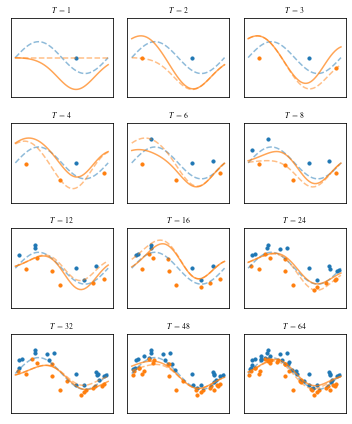

In [8]:
alpha = np.zeros(n_train, float)
epsilon = np.zeros((n_train, 2), float)
gamma_0 = 2
gamma = np.arange(n_train, dtype=float)
gamma += 1
np.sqrt(gamma, out=gamma)
np.divide(1, gamma, out=gamma)
gamma *= gamma_0

j = 0
fig, axes = plt.subplots(4, 3, figsize=(5, 6))
for i in range(n_train):
    z = K[i] @ alpha
    epsilon[i, 0] = np.sign(z - target_func(x_train[i,0]))
    epsilon[i, 1] = z
    update = epsilon[i, 0] * gamma[i]
    if i+1 in [1,2,3,4,6,8,12,16,24,32,48,64]:
        ax = axes[j//3, j%3]
        alpha_update = alpha.copy()
        alpha_update[i] -= update
        myplot(epsilon, alpha, alpha_update, ax)
        ax.set_title(r"$T=" + str(i+1) + "$", size=8)
        j += 1
    alpha[i] -= update
        
fig.tight_layout()
fig.savefig('one_d_frame.pdf')